In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv('../data/final_per_90_and_pAdj.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 106 entries, fb_id to pAdj_Tackle_int_blocks
dtypes: float64(98), object(8)
memory usage: 584.0+ KB


## next steps, filter data frame to players from pca, select features to be put in dendogram. 


In [5]:
df.columns.values

array(['fb_id', 'player_name', 'Squad_from_op', 'Opposing_Poss',
       'Opposing_Touches', 'Player', 'Nation', 'Position',
       'Tackle_pct_won', 'Nineties', 'xA', 'Key_pass', 'Comp_prog',
       'Total_Cmp', 'Total_Att', 'Total_Cmp_pct', 'Total_Tot_Dist',
       'Total_Prg_Dist', 'Short_Cmp', 'Short_Att', 'Short_Cmp_pct',
       'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct', 'Long_Cmp',
       'Long_Att', 'Long_Cmp_pct', 'touches', 'touches_def_box',
       'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd',
       'touches_att_box', 'touch_live', 'dribble_Succ', 'dribble_Att',
       'dribble_Succ_pct', 'num_dribble_past', 'dribble_megs', 'carries',
       'carries_dist', 'carries_prog_dist', 'carries_prog',
       'carries_att_3rd', 'carries_att_box', 'miss_control', 'dispossed',
       'recep_targ', 'recep_succ', 'recept_pct', 'Fouls_drawn',
       'Offsides', 'Crosses', 'PK_won', 'Aerial_win_pct', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist'

## create dendrogram only on key features

In [ ]:
[ 'player_name', 'Squad_from_op',  'Position',
        'Nineties', 'xA', 'Key_pass', 'Comp_prog',
       'Total_Cmp', 'Total_Att', 'Total_Cmp_pct', 'Total_Tot_Dist',
       'Total_Prg_Dist', 'Short_Cmp', 'Short_Att', 'Short_Cmp_pct',
       'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct', 'Long_Cmp',
       'Long_Att', 'Long_Cmp_pct', 'touches', 'touches_def_box',
       'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd',
       'touches_att_box', 'touch_live', 'dribble_Succ', 'dribble_Att',
       'dribble_Succ_pct', 'num_dribble_past', 'dribble_megs', 'carries',
       'carries_dist', 'carries_prog_dist', 'carries_prog',
       'carries_att_3rd', 'carries_att_box', 'miss_control', 'dispossed',
       'recep_targ', 'recep_succ', 'recept_pct', 'Fouls_drawn',
       'Offsides', 'Crosses', 'PK_won', 'Aerial_win_pct', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Club',
       'Base Salary', 'pAdj_Total_tackles', 'pAdj_Tackles_Won',
       'pAdj_Tackles_Def_3rd', 'pAdj_Tackles_Mid_3rd',
       'pAdj_Tackles_Att_3rd', 'pAdj_Num_Dribblers_tackled',
       'pAdj_Num_Dribbled_past', 'pAdj_total_pressing',
       'pAdj_Won_ball_5_sec', 'pAdj_pres_Def_3rd', 'pAdj_pres_Mid_3rd',
       'pAdj_pres_Att_3rd', 'pAdj_Blocks', 'pAdj_Blocked_shots',
       'pAdj_Blocked_SOT', 'pAdj_Blocked_pass', 'pAdj_Interceptions',
       'pAdj_Tackles_and_Ints', 'pAdj_Clearences', 'pAdj_Yellow_cards',
       'pAdj_Red_cards', 'pAdj_Second_yellow', 'pAdj_Fouls',
       'pAdj_def_interceptions', 'pAdj_from_mish_tackles_won',
       'pAdj_PK_conceded', 'pAdj_OG', 'pAdj_Recoveries',
       'pAdj_Aerial_Duels_lost', 'lost_tackles', 'True_tackle_pct',
       'pAdj_Tackle_int_blocks']

In [ ]:
# offensive stats

Passes attempted
Short Pass Ratio; the % of passes played short
Cross Ratio; the % of crosses in total passes played
Dribbles
Touches in box
Forward Pass Ratio; the % of passes played forward
Length of short/medium pass
xA, or Expected Assists; the likeliness of a shot-assist ending up as a goal
Smart Passes; as defined by Wyscout, a smart pass is ‘for significative pass or smart pass in general. Something more than a simple pass, not so easy to be done. There has to be some idea in the pass, something creative, when the player is cutting the lines and winning some advantage for his teammates with this pass, leading them in good position to attack. The pass should be between 2–3 opposite players.’
Final Third to Forward Pass ratio; the % of forward passes played to the final third

In [13]:
mini = df[[
#     'player_name', 
           'pAdj_Tackles_and_Ints', 
       'pAdj_def_interceptions', 
    'pAdj_from_mish_tackles_won',
    
    'pAdj_Recoveries', 
#     'True_tackle_pct',
    'pAdj_Tackle_int_blocks'
]]

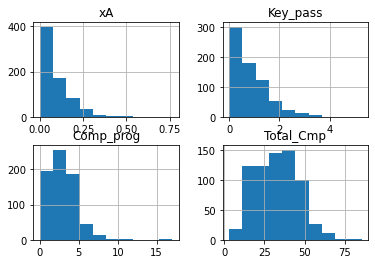

In [10]:
#  df[[
# #      'player_name', 
#            'pAdj_Tackles_and_Ints', 
#        'pAdj_def_interceptions', 
#     'pAdj_from_mish_tackles_won',
    
#     'pAdj_Recoveries', 
#     'True_tackle_pct',
# #     'pAdj_Tackle_int_blocks'
# ]].hist()

mini =  df[[
'xA', 'Key_pass', 'Comp_prog',
       'Total_Cmp',
]].hist()


mini =  df[[
'xA', 'Key_pass', 'Comp_prog',
       'Total_Cmp',
]]
mini = mini.iloc[:20]

In [20]:
 mini = df.iloc[:20][[
#      'player_name', 
           'pAdj_Tackles_and_Ints', 
       'pAdj_def_interceptions', 
    'pAdj_from_mish_tackles_won',
    
    'pAdj_Recoveries', 
    'True_tackle_pct',
#     'pAdj_Tackle_int_blocks'
]]

In [24]:
labels=df['player_name'][:20].values
labels

array(['Carles Gil', 'Julian Gressel', 'Emanuel Reynoso', 'Albert Rusnák',
       'Maximiliano Moralez', 'Luciano Acosta', 'Lucas Zelarayán',
       'Djordje Mihailovic', 'Brooks Lennon', 'Álvaro Medrán',
       'João Paulo Mior', 'Marcelino Moreno', 'Hany Mukhtar',
       'Jack Price', 'Yimmi Chará', 'Gustavo Bou', 'Lewis Morgan',
       'Mauricio Pereyra', 'Jesus Ferreira', 'Víctor Vázquez'],
      dtype=object)

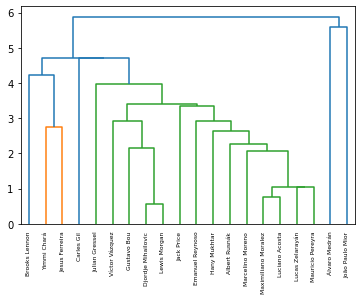

In [25]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(mini, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=df['player_name'][:20].values,
            leaf_rotation=90, leaf_font_size=6)
plt.show()